In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
random_state = 42
np.random.seed(random_state)

In [23]:
url = './data.csv'
df0 = pd.read_csv(url, index_col=0)
print(f' number of samples {df0.shape[0]},  number of feature {df0.shape[1]}')


 number of samples 7891,  number of feature 10


In [24]:
df0.head()

,Territorio,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,Abano Terme,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,Abbadia Cerreto,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,Abbadia Lariana,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,Abbadia San Salvatore,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,Abbasanta,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0


In [25]:
df0.describe()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7.891000e+03
mean,0.436320,1503.934989,682.607528,1514.311367,1141.186668,112.176403,85.558738,39.987961,1.094664e+08
std,7.708889,8019.878927,3173.115435,6818.879697,7609.469415,1152.192290,978.254230,588.108958,7.821773e+08
min,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.388280e+05
25%,0.000000,226.000000,109.000000,207.000000,112.000000,7.000000,4.000000,0.000000,1.193600e+07
50%,0.000000,525.000000,253.000000,520.000000,309.000000,21.000000,14.000000,5.000000,3.099277e+07
75%,0.000000,1256.000000,600.000000,1347.000000,876.500000,68.000000,46.000000,20.000000,8.517508e+07
max,456.000000,540724.000000,205064.000000,413523.000000,520285.000000,78473.000000,66290.000000,35644.000000,5.130494e+10


In [26]:
df0.boxplot()

<Axes: >

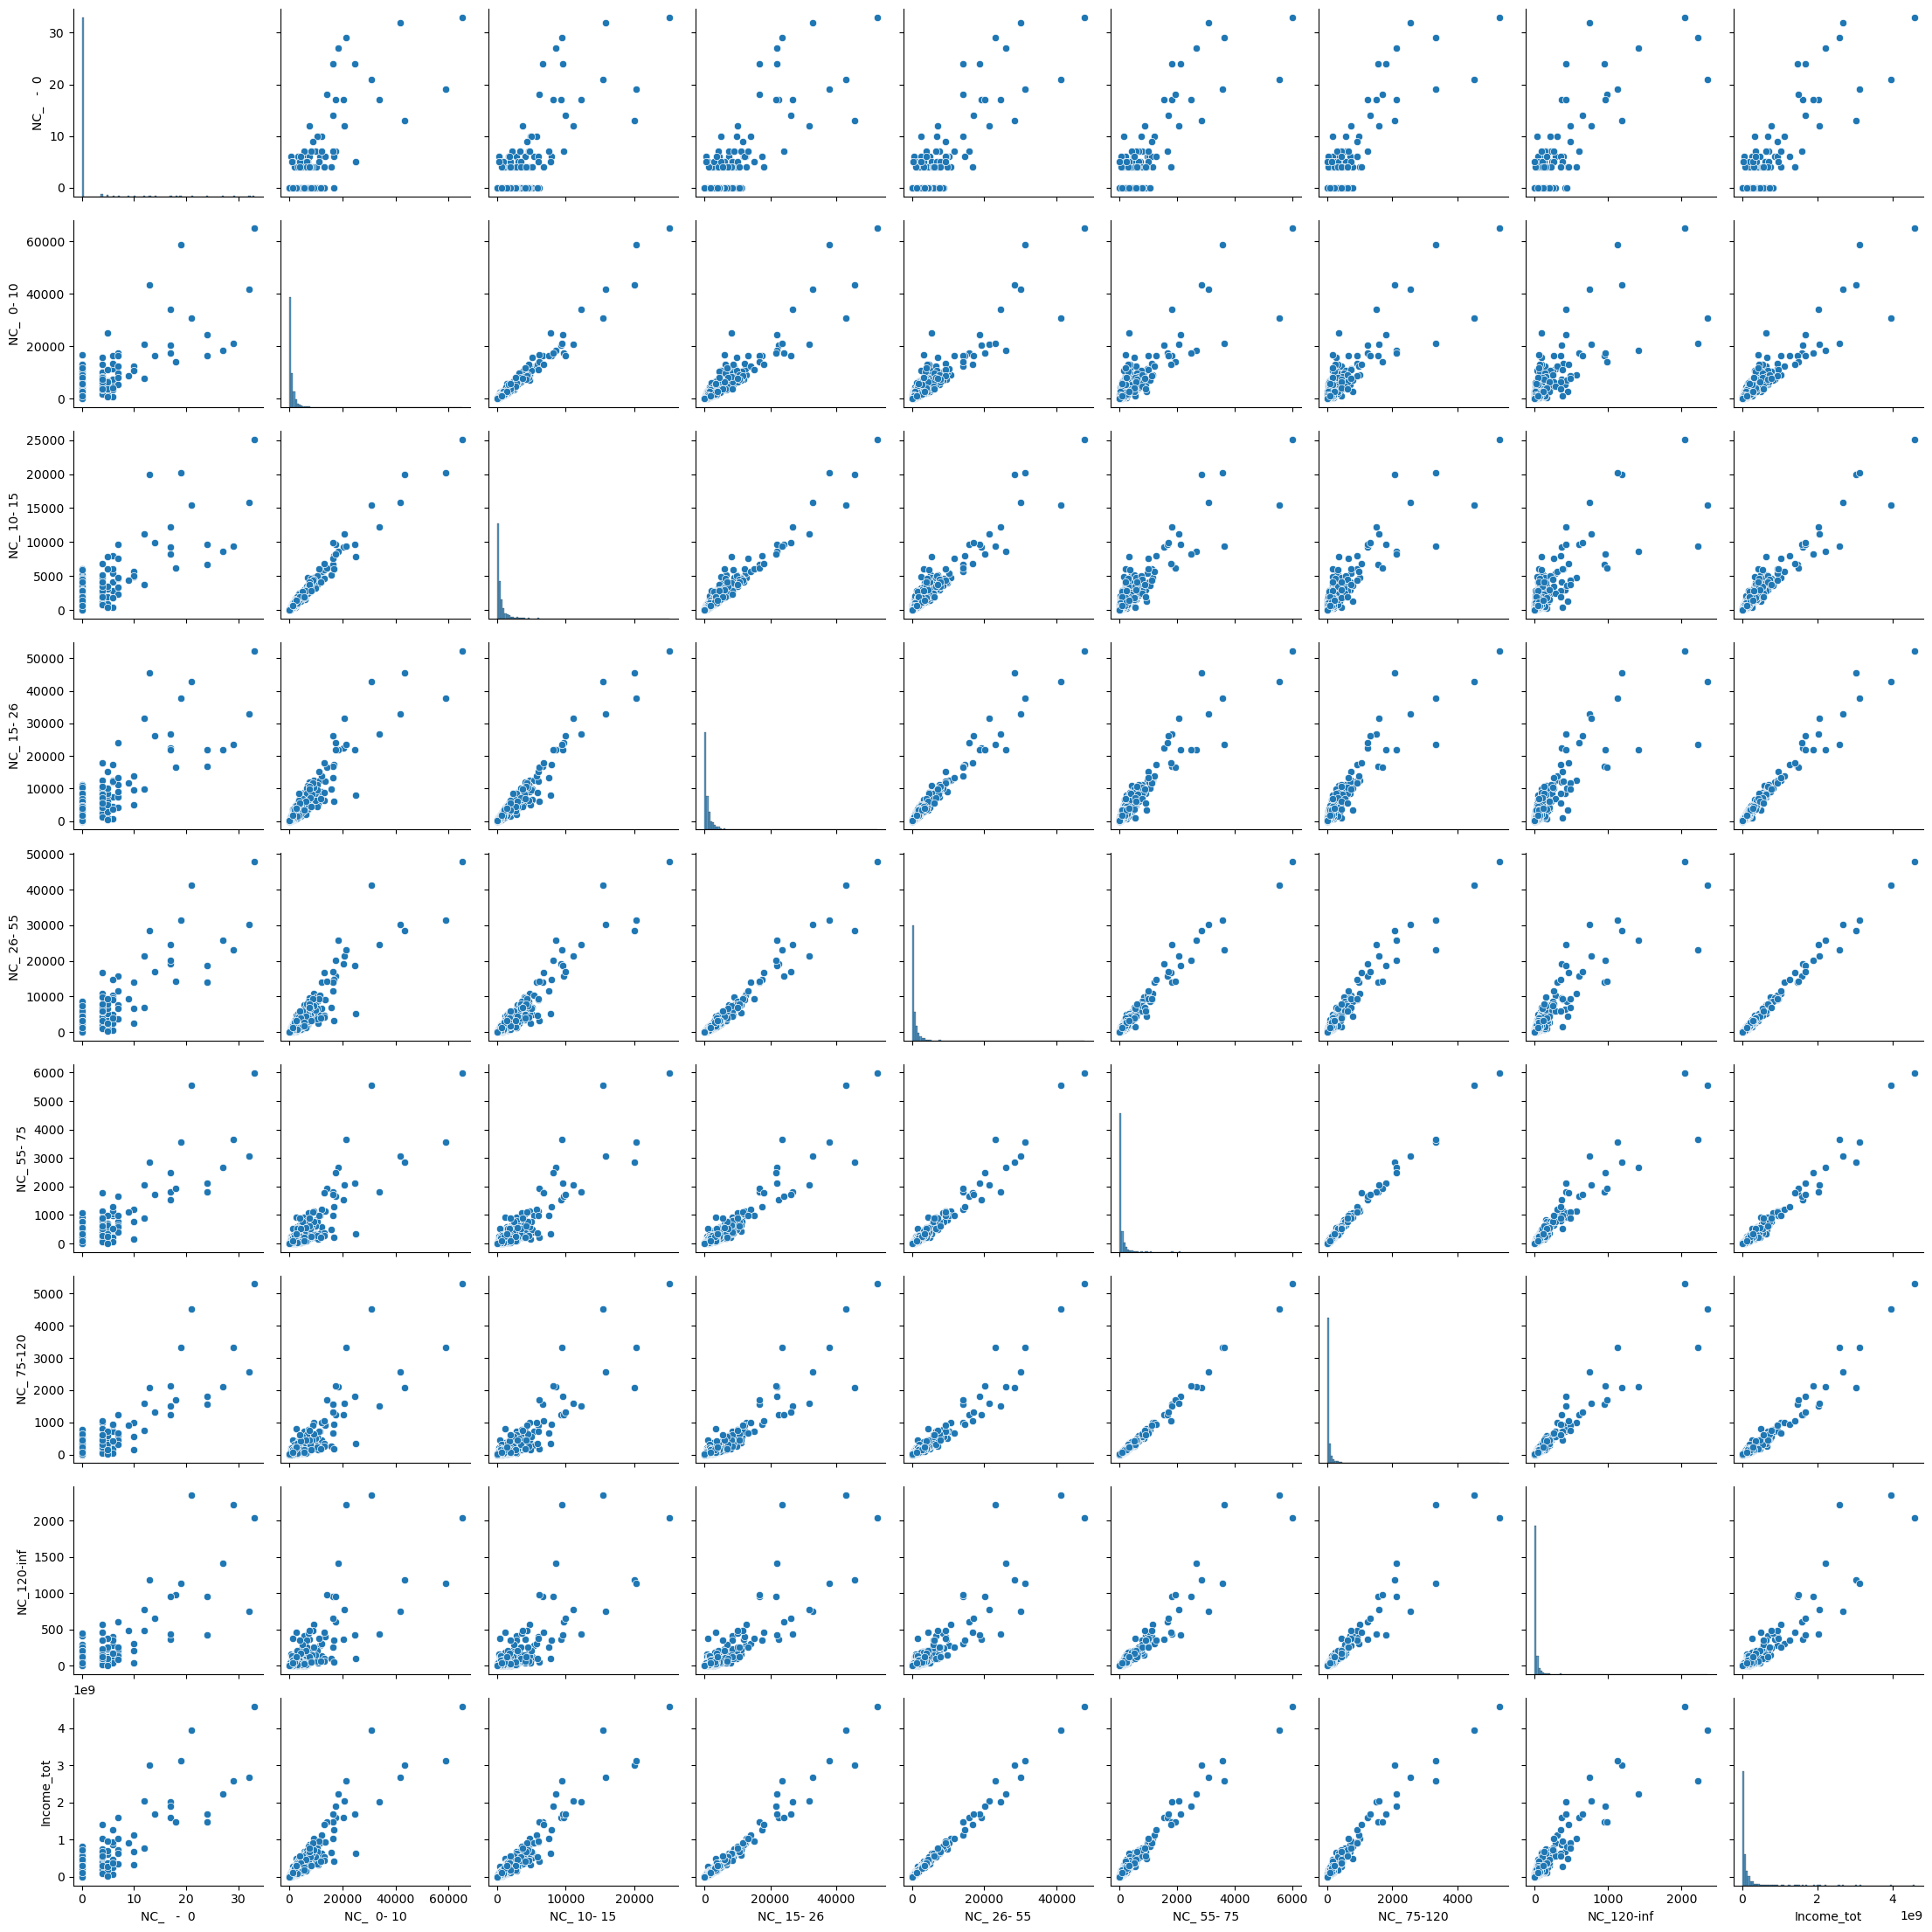

In [ ]:
sns.pairplot(df0.sample(2000))
plt.show()

In [87]:
df0['Territorio'].unique().shape

(7891,)

territorio, had different values in every column, so we eliminate it

In [28]:
df1 = df0.drop(['Territorio'],axis=1)
print(f' number of samples {df1.shape[0]},  number of feature {df1.shape[1]}')

 number of samples 7891,  number of feature 9


the range of data is to great so we need to uniforme the scale with minMax



In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_data = mms.fit_transform(df1)
df2 = pd.DataFrame(scaled_data, columns=df1.columns)
df2.head()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,0.0,0.006724,0.009738,0.011032,0.006281,0.005263,0.006034,0.004966,0.006774
1,0.0,0.000083,0.000141,0.000164,0.000079,0.000000,0.000000,0.000000,0.000062
2,0.0,0.000936,0.001346,0.001903,0.001261,0.000994,0.000724,0.000870,0.001148
3,0.0,0.002401,0.003818,0.004389,0.001449,0.000879,0.000498,0.000365,0.001703
4,0.0,0.001058,0.000946,0.001059,0.000826,0.000331,0.000196,0.000000,0.000599


In [ ]:
df2.describe()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000
mean,0.000957,0.002772,0.003329,0.003650,0.002193,0.001429,0.001291,0.001122,0.002129
std,0.016905,0.014832,0.015474,0.016490,0.014626,0.014683,0.014757,0.016500,0.015246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000409,0.000532,0.000488,0.000215,0.000089,0.000060,0.000000,0.000228
50%,0.000000,0.000962,0.001234,0.001245,0.000594,0.000268,0.000211,0.000140,0.000599
75%,0.000000,0.002314,0.002926,0.003245,0.001685,0.000867,0.000694,0.000561,0.001656
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


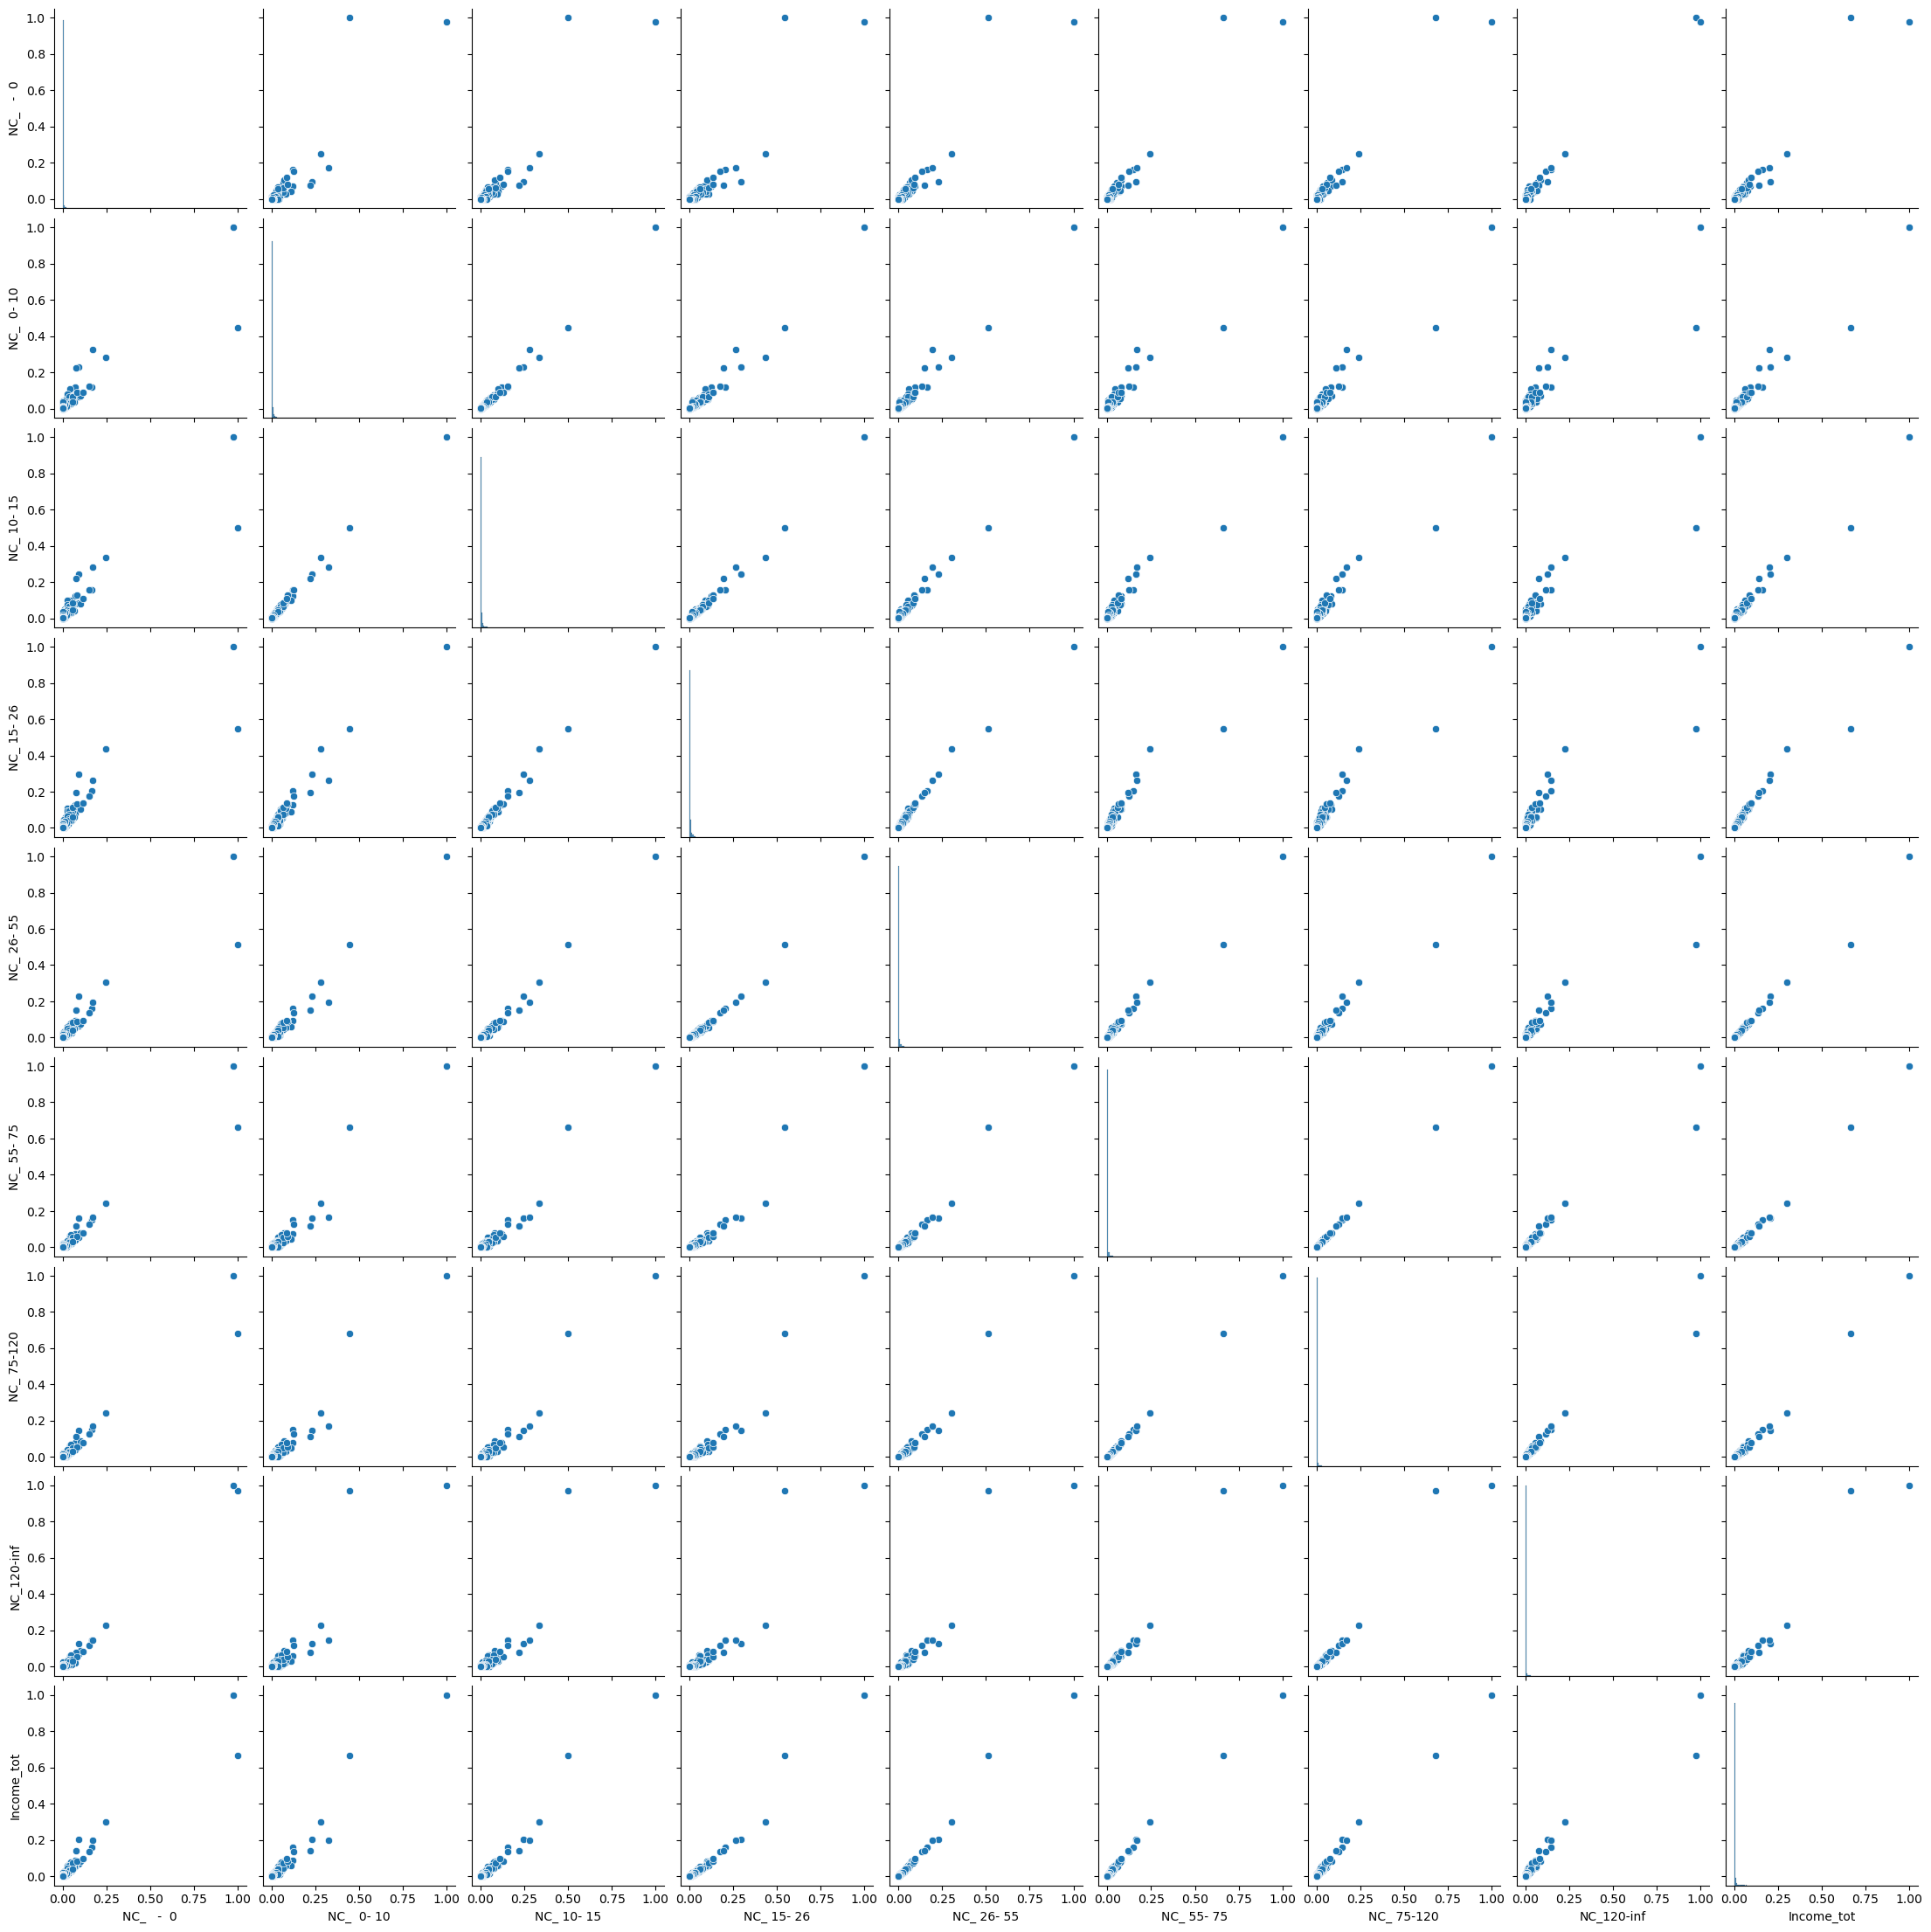

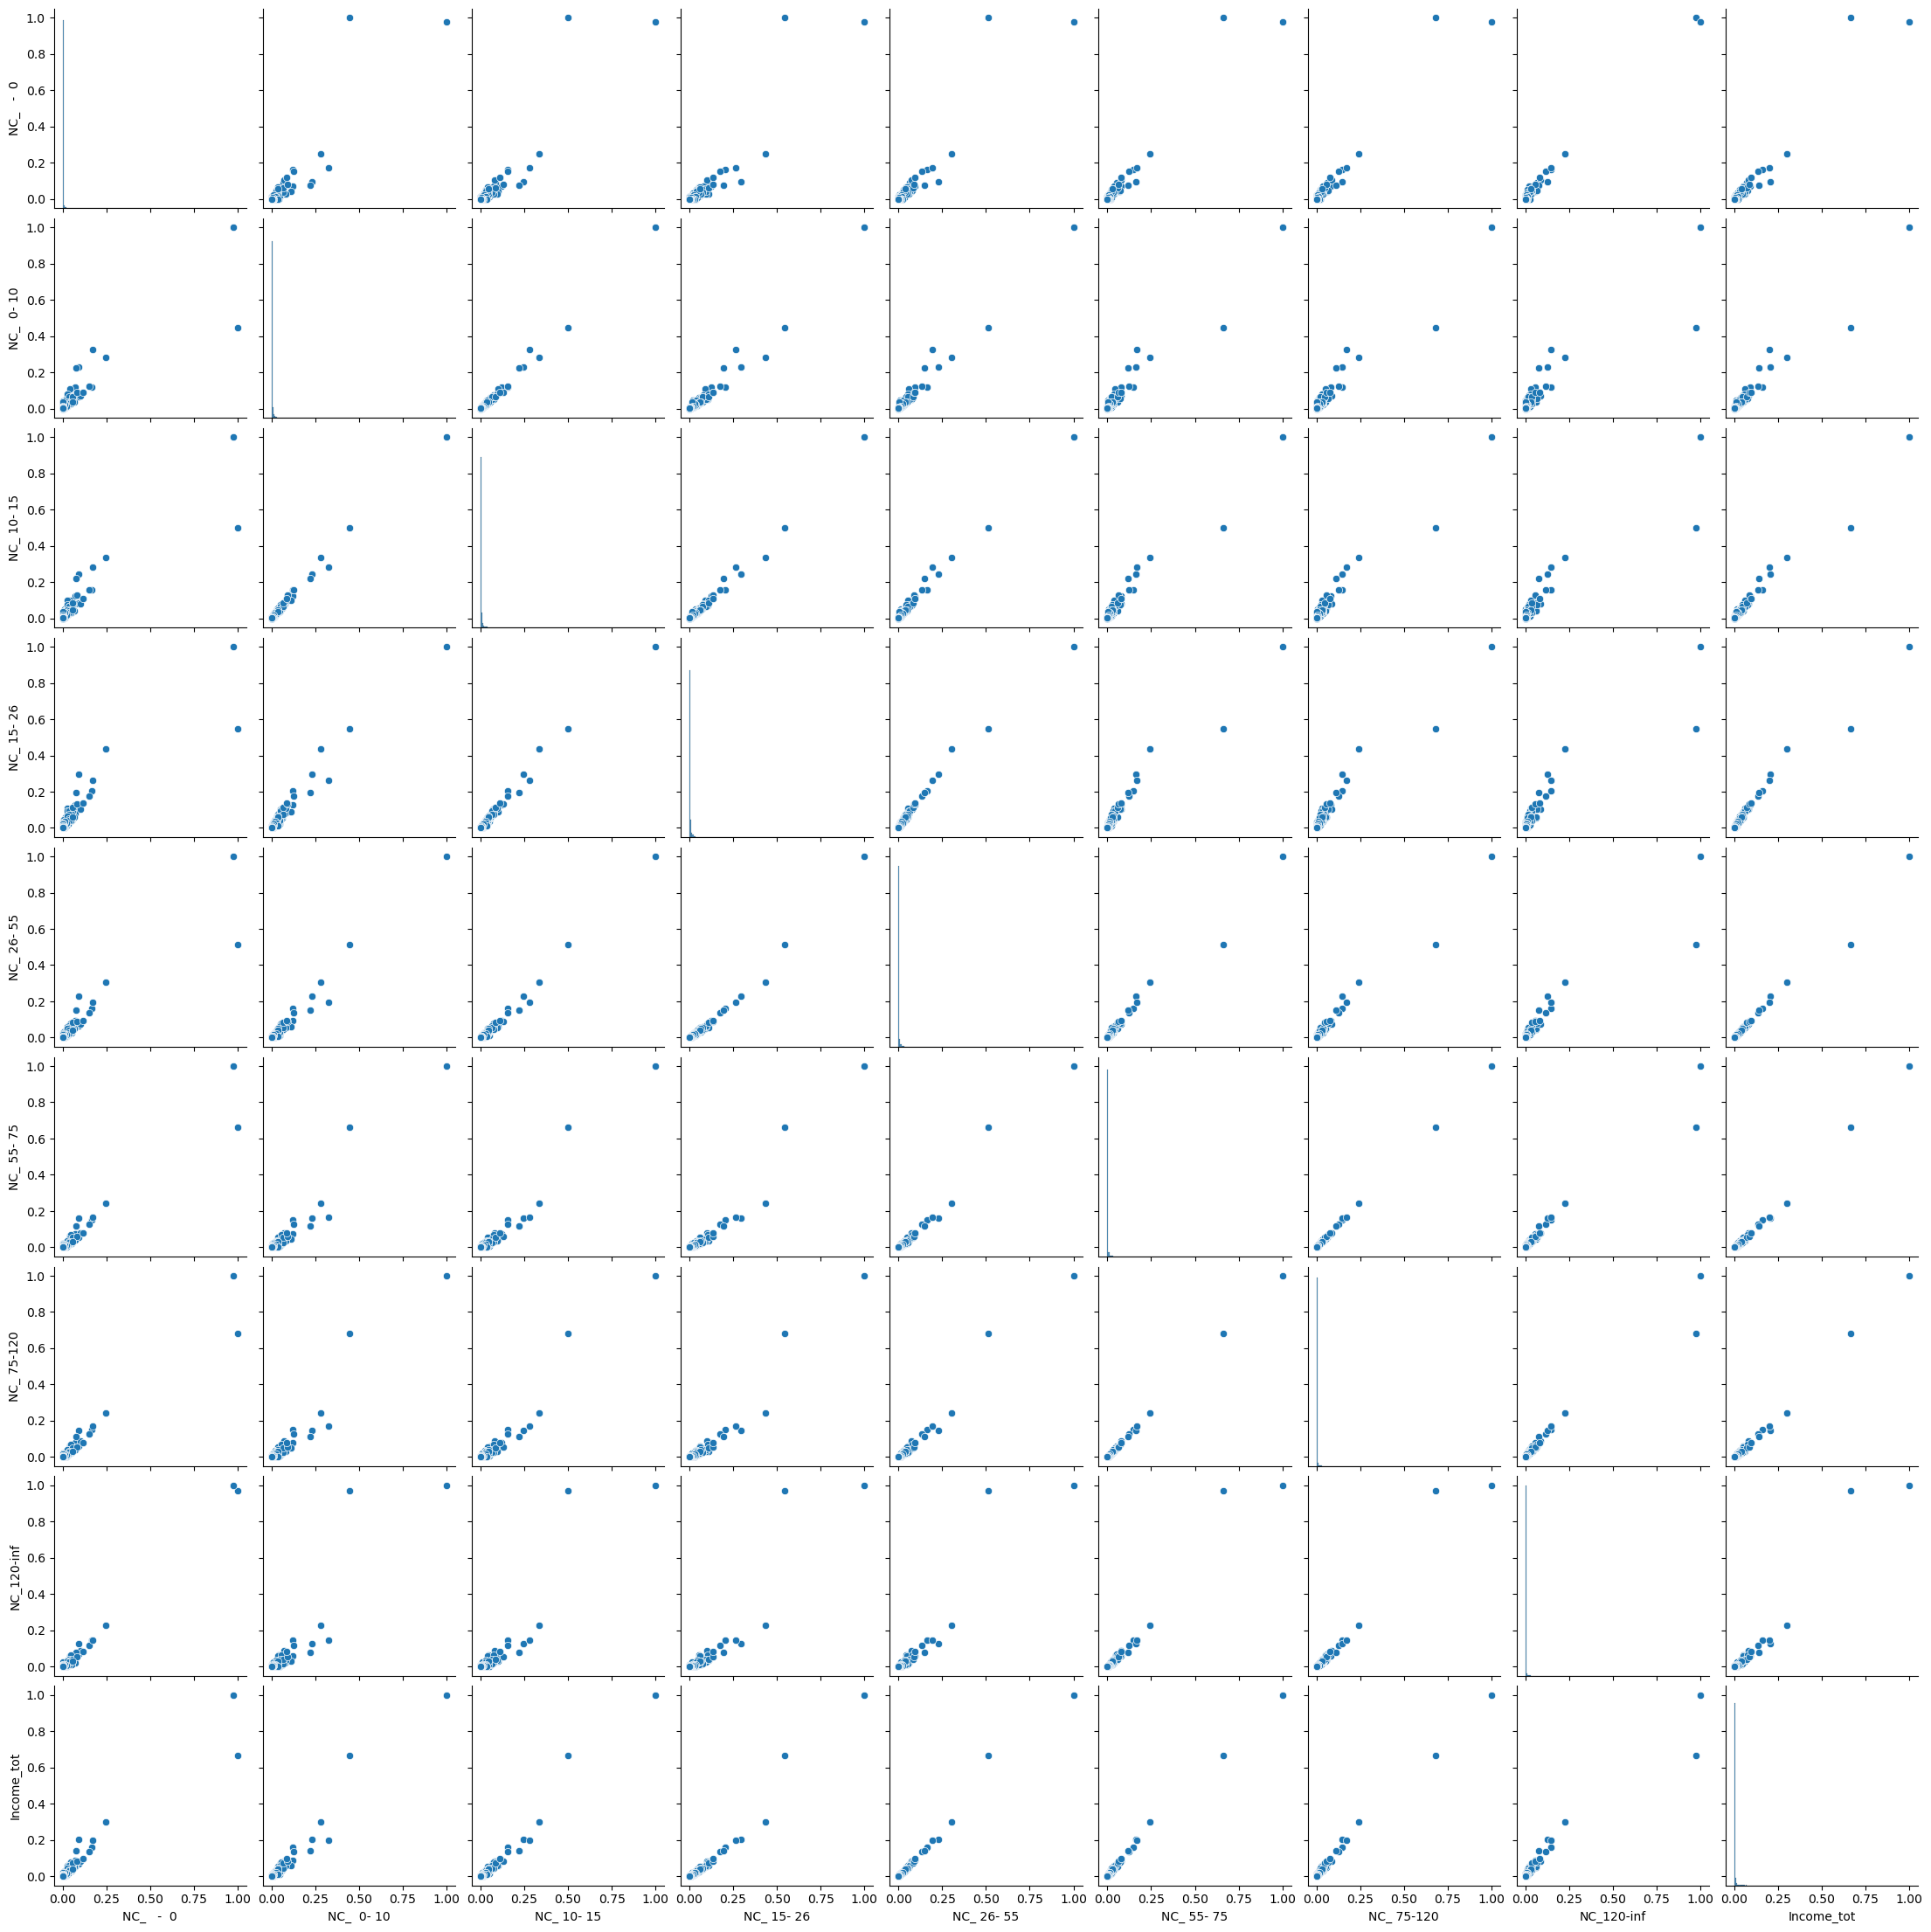

In [ ]:
sns.pairplot(df2)
plt.show()

every value is linearly dipended of the other values

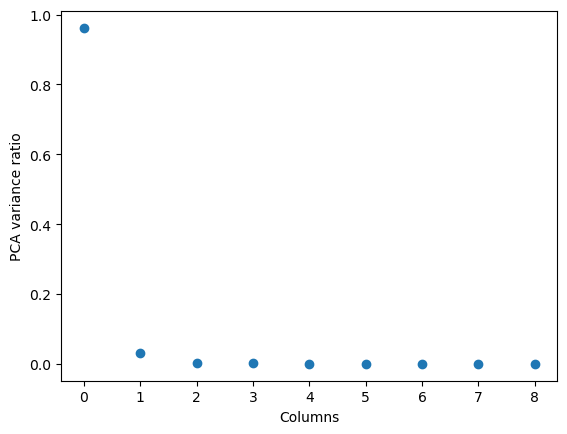

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_transformed = pca.fit_transform(df2)

plt.scatter(range(df2.shape[1]), pca.explained_variance_ratio_)
plt.ylabel('PCA variance ratio')
plt.xlabel('Columns')
plt.show()

this can be seen also in pca analysis

In [31]:
X = df2

In [36]:
k_range = [*range(2,11)]

In [34]:
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))
report_km = pd.DataFrame([],columns=['K','inertia','silhouette_score'])

for param in pg:
    km = KMeans(n_clusters=param['n_clusters'], random_state=random_state)
    y_km = km.fit_predict(X)
    report_km.loc[len(report_km)]=[
        param['n_clusters'],
        km.inertia_,
                silhouette_score(X,y_km)
    ]

display(
    report_km
)

,K,inertia,silhouette_score
0,2.0,4.580130,0.996032
1,3.0,2.514802,0.975769
2,4.0,1.850724,0.975655
3,5.0,0.972749,0.934159
4,6.0,0.624958,0.826442
5,7.0,0.488286,0.815608
6,8.0,0.395435,0.737618
7,9.0,0.317180,0.685839
8,10.0,0.262463,0.685833


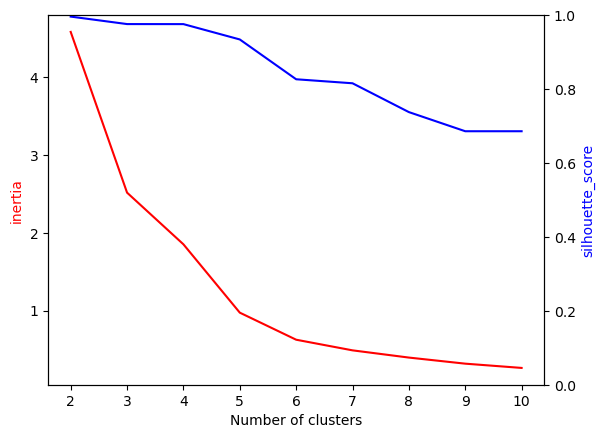

In [38]:
fig, ax = plt.subplots()
ax.plot(k_range,report_km['inertia'],color='red')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('inertia', color='red')

ax2 = ax.twinx()
ax2.plot(k_range,report_km['silhouette_score'],color='blue')
ax2.set_ylabel('silhouette_score', color='blue')
ax2.set_ylim(0,1)

plt.show()

Both 3 and 5 are good, but i choose 5 becouse the inertia is very low there, and the silhouette_score don't decrease too much

In [39]:
k=5
km = KMeans(n_clusters=k,random_state=random_state)
y_km = km.fit_predict(X)
inertia_km = km.inertia_
silhouette_score_km = silhouette_score(X,y_km)
print(f'Number of cluster:{k}, inertia:{inertia_km}, silhoette_score_km:{silhouette_score_km}')

Number of cluster:5, inertia:0.9727494205119993, silhoette_score_km:0.934158598855557


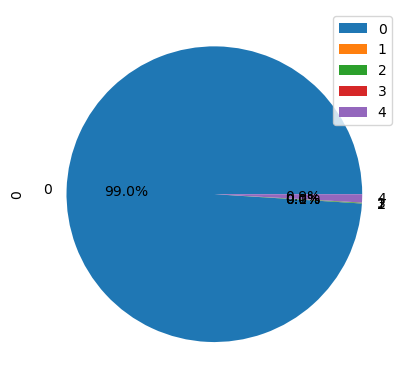

In [42]:
clust_sizes_km = np.unique(y_km,return_counts=True)
pd.DataFrame(clust_sizes_km[1]).plot.pie(y=0, autopct='%1.1f%%')
plt.show()

In [73]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_pt = pt.fit_transform(X)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = pd.DataFrame(ss.fit_transform(X_pt), columns=X.columns)

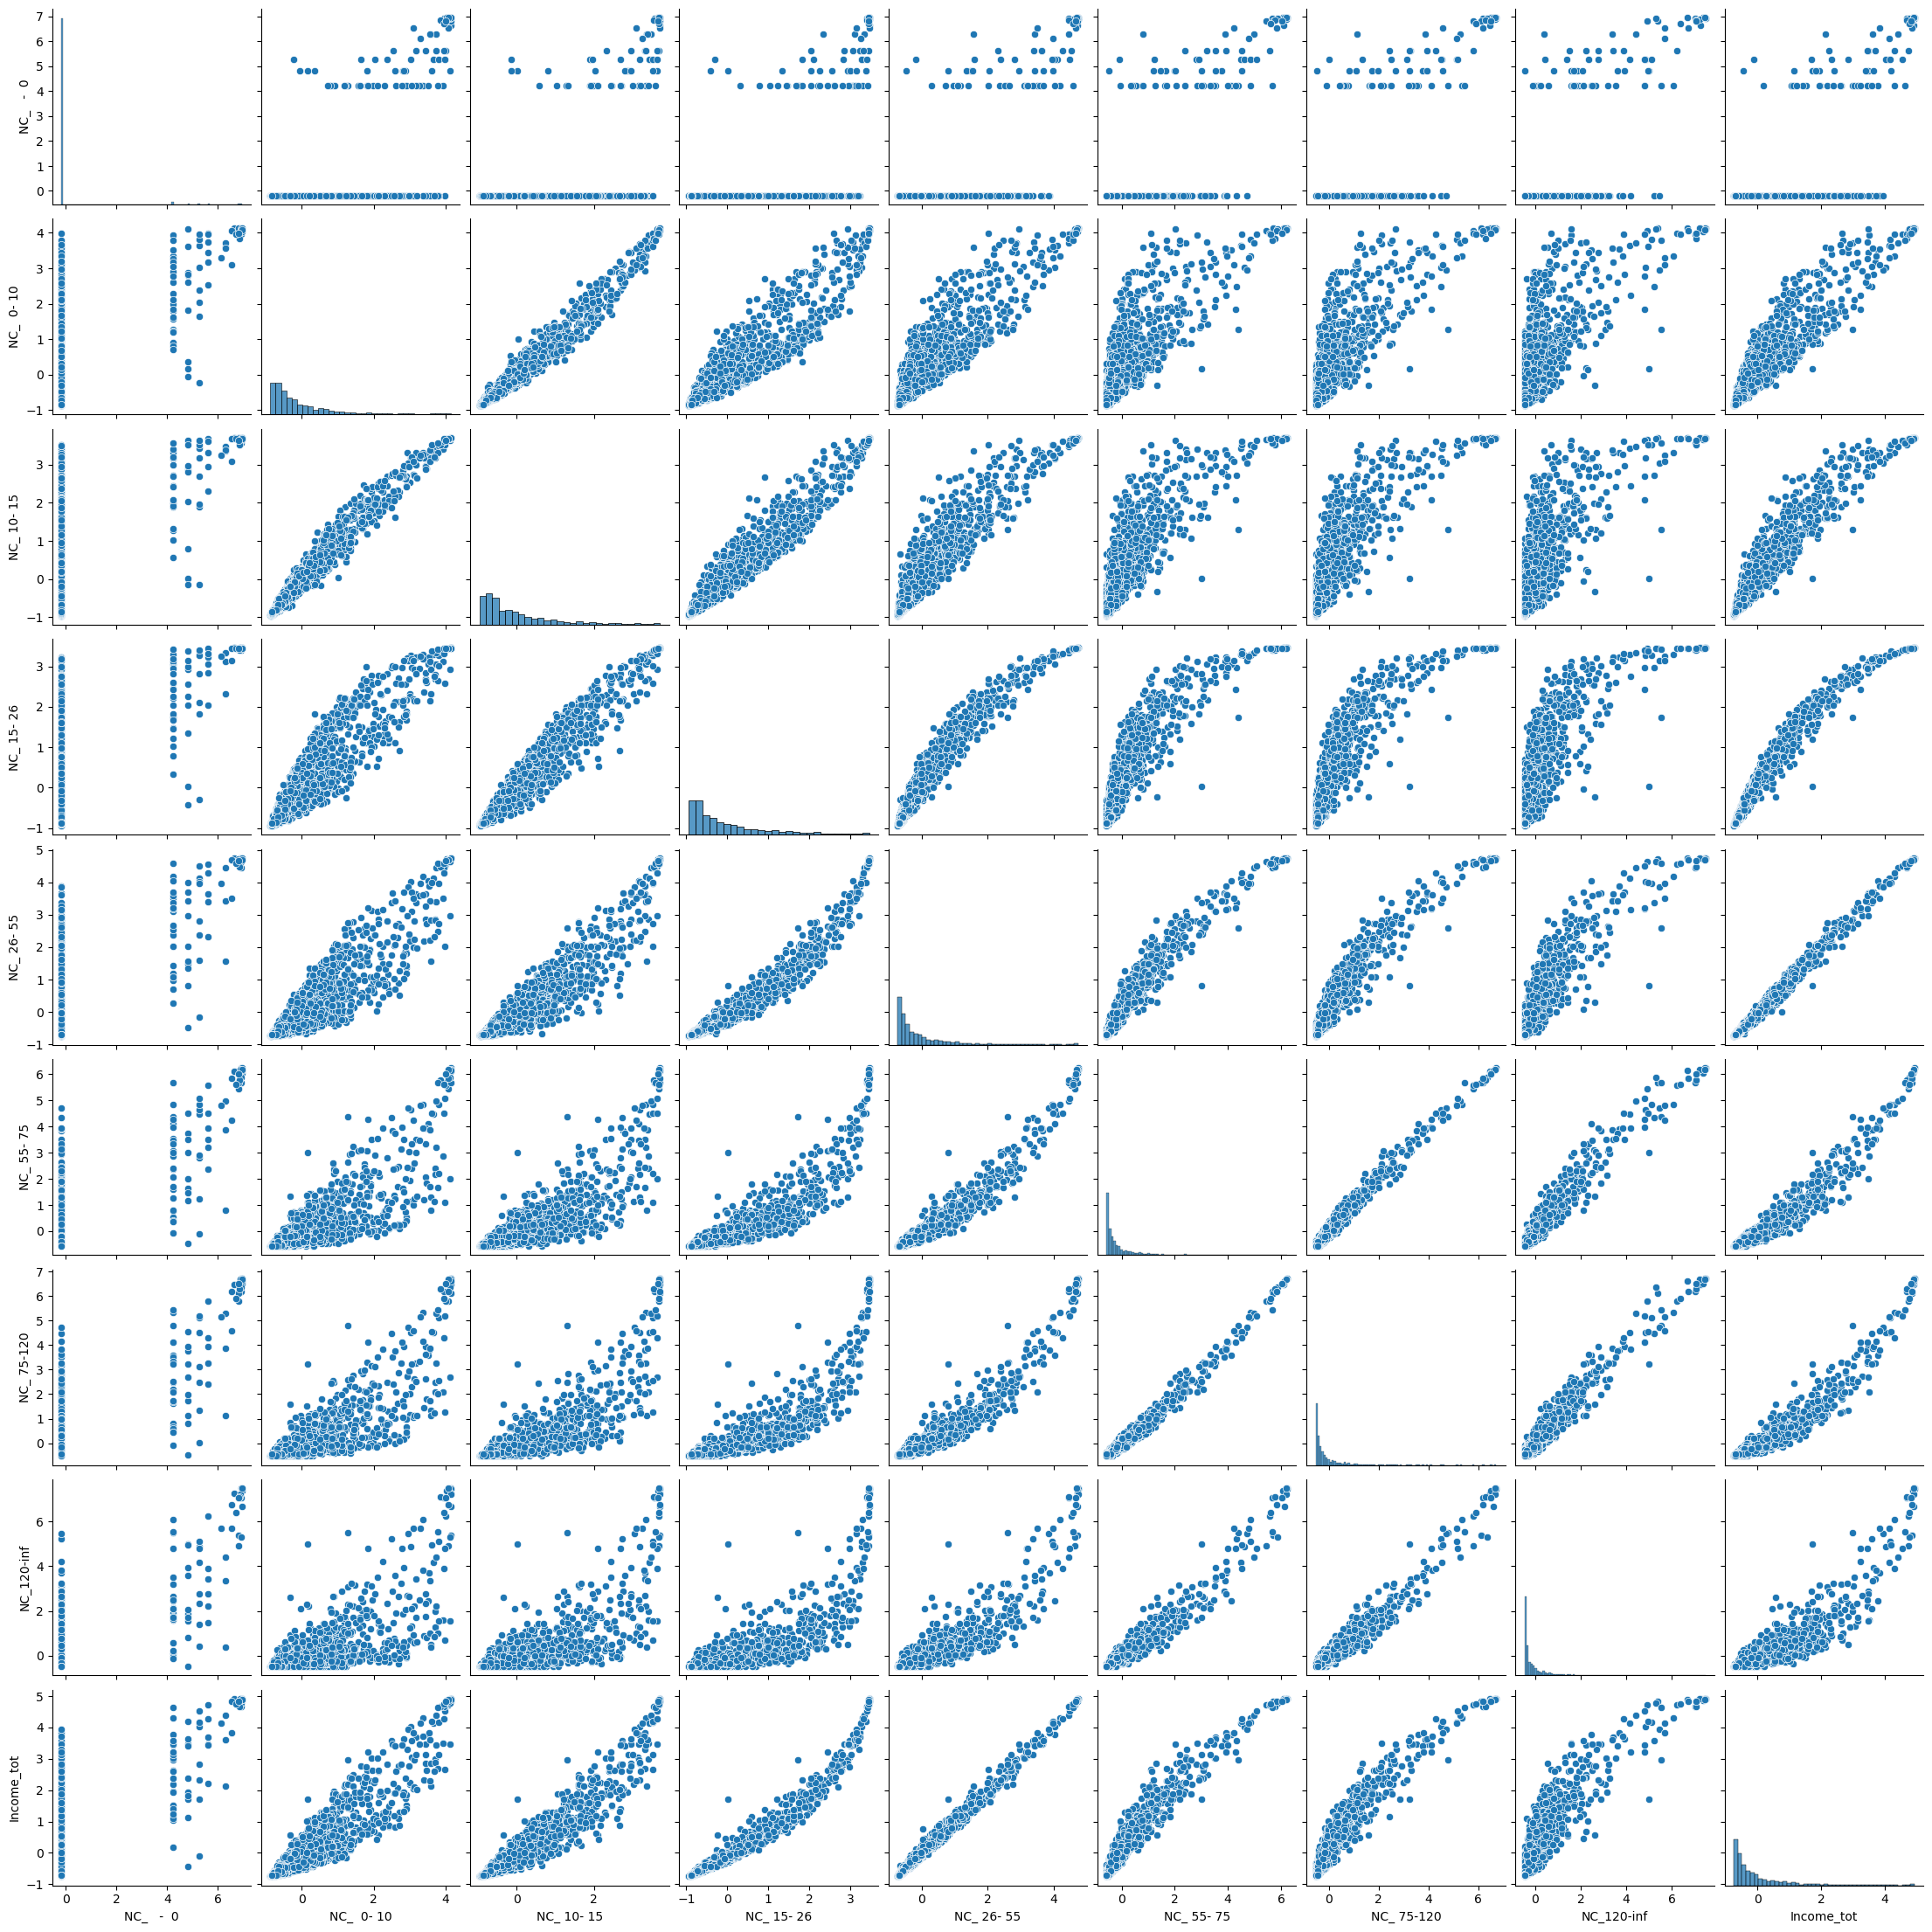

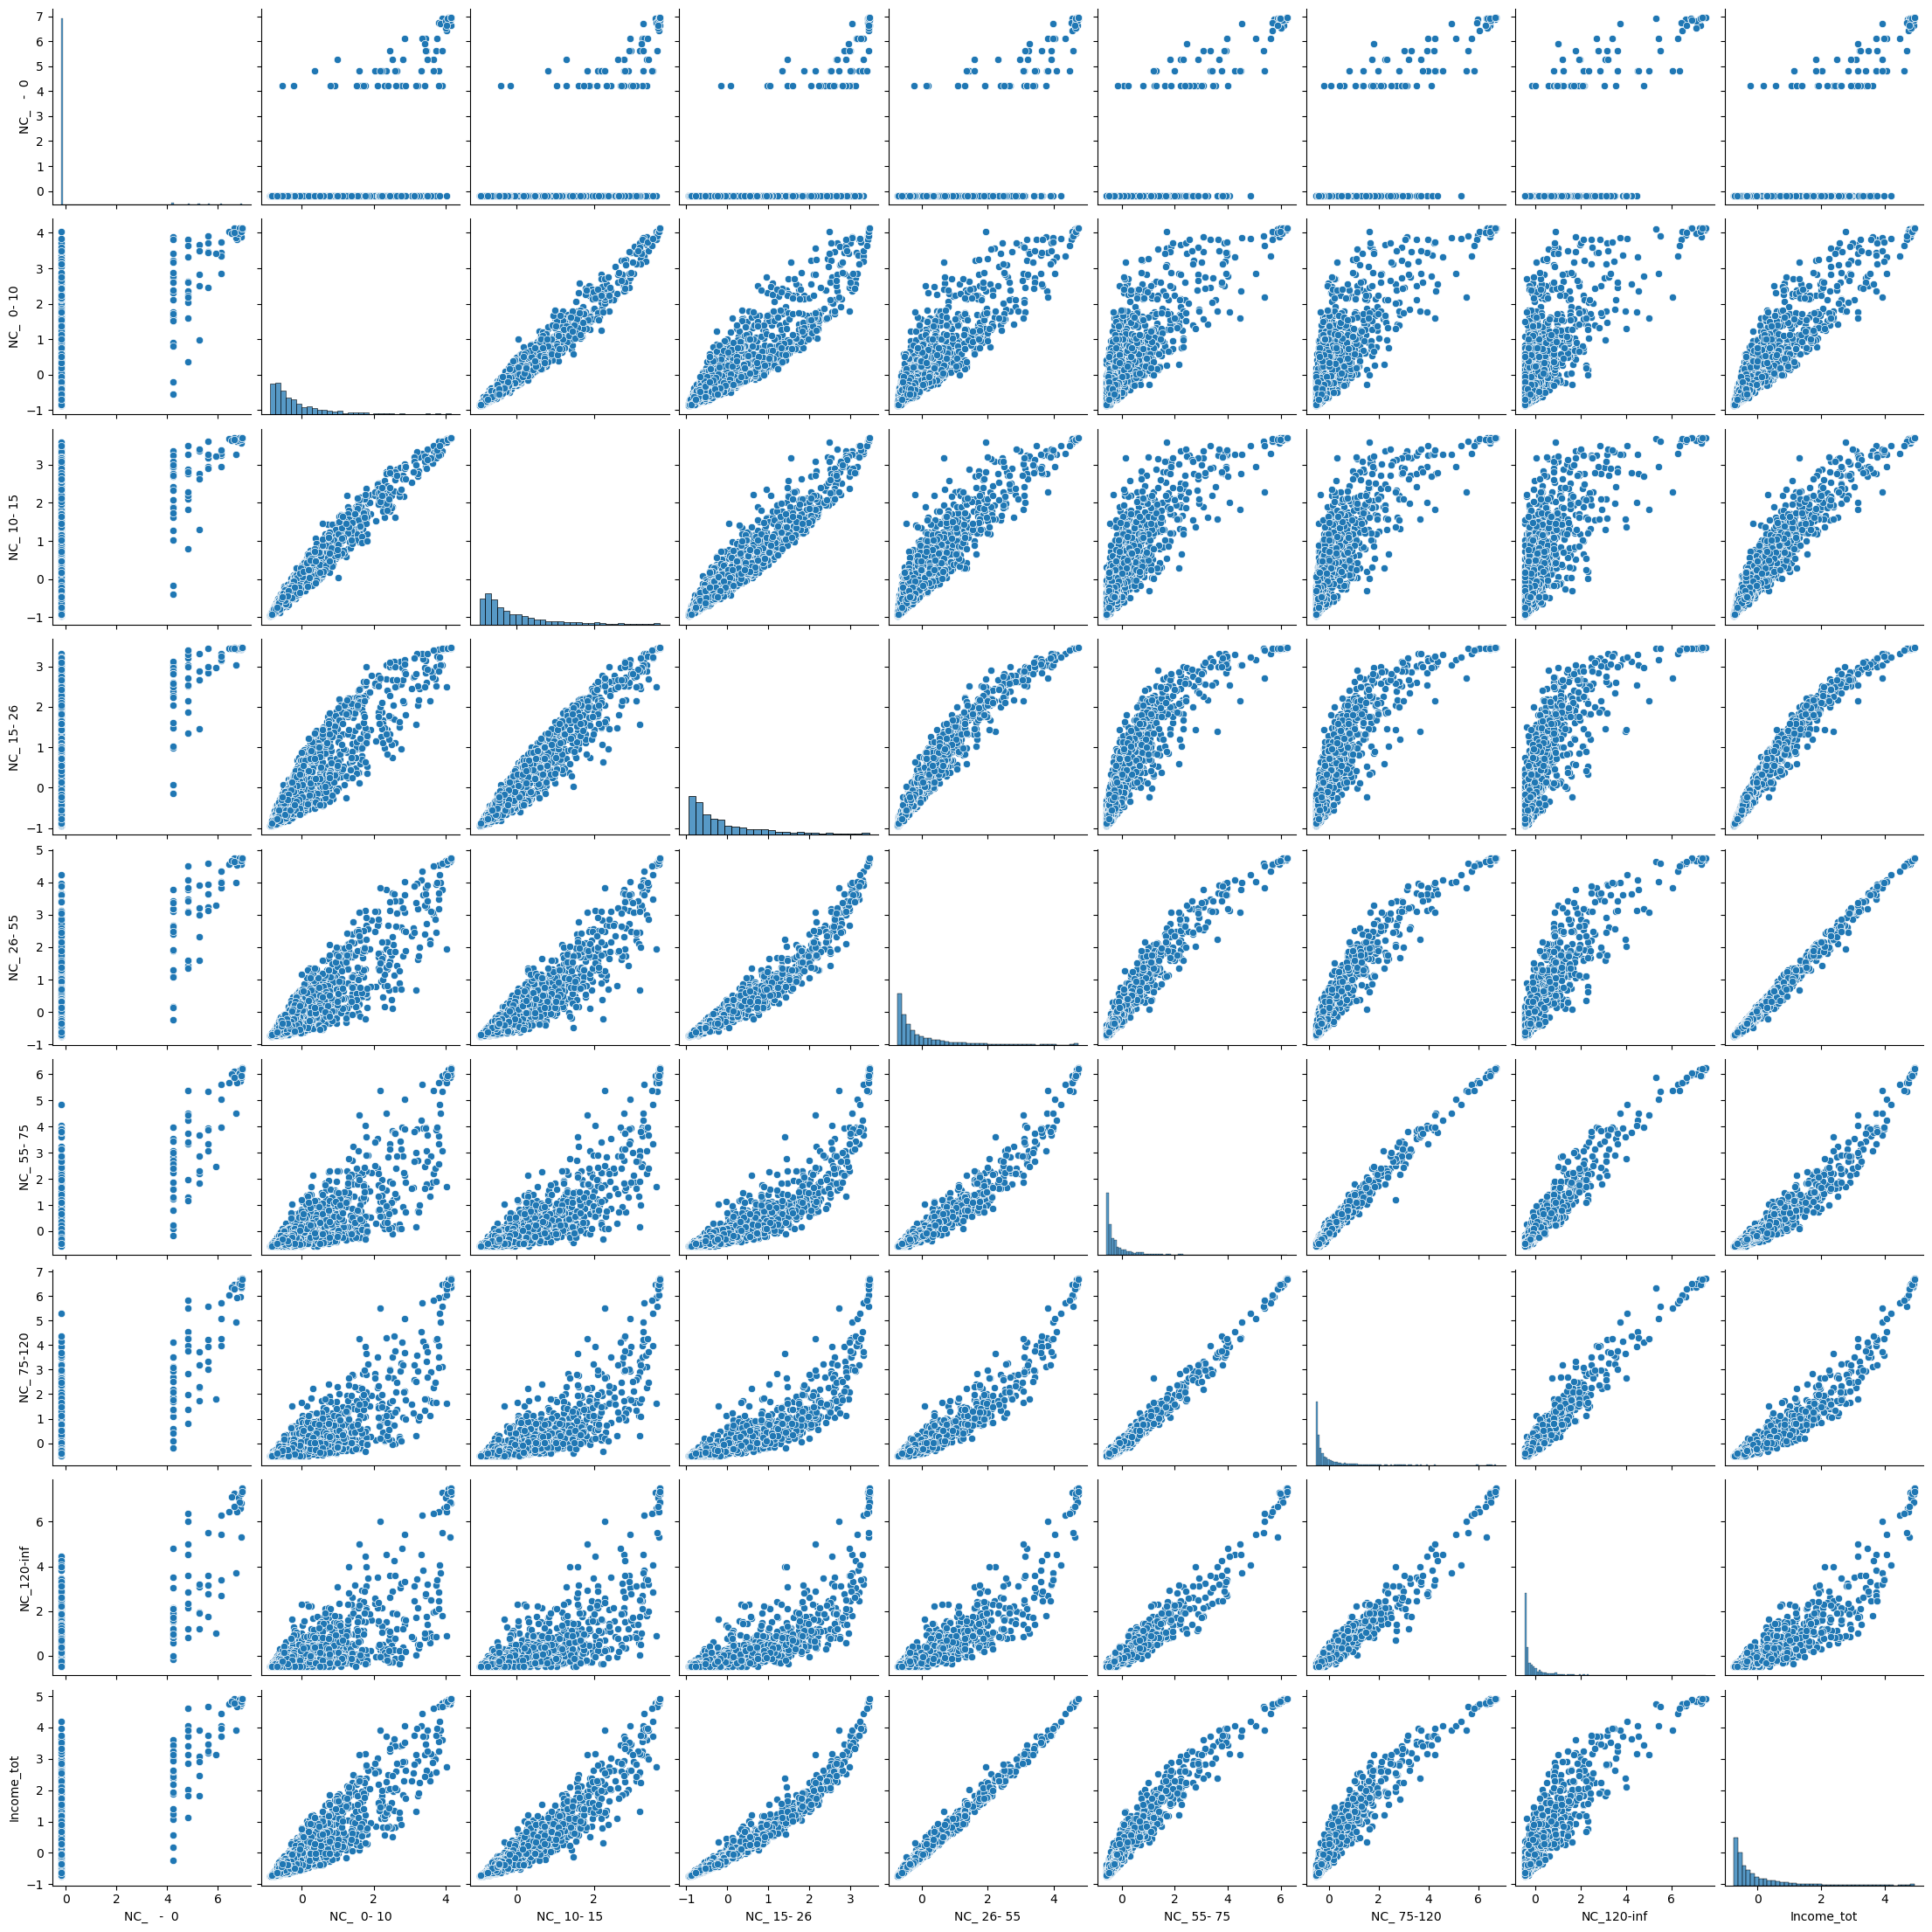

In [75]:
sns.pairplot(X_std.sample(2000))
plt.show()

In [76]:
from sklearn.cluster import AgglomerativeClustering

k_range = [*range(2,7)]

parameters_agl = [{
    'n_cluster': k_range,
    'linkage': ['ward','complete','average','single']
}]
pg = list(ParameterGrid(parameters_agl))
result_ac = pd.DataFrame([], columns=['K','linkage','silhouette_score'])

for param in pg:
    ac = AgglomerativeClustering(
        param['n_cluster'],
        linkage=param['linkage']
    )
    y_ac = ac.fit_predict(X)
    result_ac.loc[len(result_ac)]=[
        param['n_cluster'],
        param['linkage'],
        silhouette_score(X,y_ac)
    ]


In [77]:
display(result_ac.sort_values(by='silhouette_score', ascending=False))

,K,linkage,silhouette_score
0,2,ward,0.996032
5,2,complete,0.996032
15,2,single,0.996032
10,2,average,0.996032
6,3,complete,0.995027
11,3,average,0.995027
16,3,single,0.995027
17,4,single,0.988435
18,5,single,0.984295
1,3,ward,0.983889


In [83]:
ac=AgglomerativeClustering(n_clusters=4,linkage='average')
y_ac = ac.fit_predict(X)
silhouette_score(X,y_ac)

0.9837884548940872

In [84]:
np.unique(y_ac,return_counts=True)

(array([0, 1, 2, 3]), array([   6, 7883,    1,    1]))

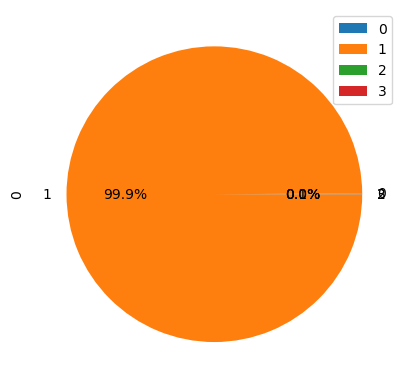

In [85]:
clust_sizes_ac = np.unique(y_ac,return_counts=True)
pd.DataFrame(clust_sizes_ac[1]).plot.pie(y=0,autopct='%1.1f%%');
plt.show()